# 1. Configuración del Entorno y Carga de Datos

En esta sección importamos las librerías necesarias para la manipulación de datos (Pandas) y álgebra lineal (Numpy). También configuramos el acceso a Google Drive para leer el dataset del Hospital El Pino.

Objetivo: Cargar el archivo `dataset_elpino.csv` y verificar sus dimensiones iniciales.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

# Ignoramos advertencias no críticas para mantener limpio el output
warnings.filterwarnings('ignore')

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Ruta del archivo (Ajustada a tu estructura de carpetas)
ruta_dataset = "/content/drive/MyDrive/UNAB/Magister en Informatica/Topicos de ciencia de datos/dataset/dataset_elpino.csv"

# Intentamos leer el archivo probando codificación Latin-1 (común en Excel español)
try:
    print("Intentando cargar con encoding 'latin-1'...")
    df = pd.read_csv(ruta_dataset, sep=";", encoding='latin-1', on_bad_lines='skip')
except UnicodeDecodeError:
    print("Falló latin-1. Intentando con 'utf-8'...")
    df = pd.read_csv(ruta_dataset, sep=";", encoding='utf-8', on_bad_lines='skip')

# Verificación
print("\n--- Carga Exitosa ---")
print(f"Dimensiones del dataset: {df.shape}")
print("\nPrimeras 3 filas:")
display(df.head(3))

Intentando cargar con encoding 'latin-1'...

--- Carga Exitosa ---
Dimensiones del dataset: (14561, 68)

Primeras 3 filas:


,Diag 01 Principal (cod+des),Diag 02 Secundario (cod+des),Diag 03 Secundario (cod+des),Diag 04 Secundario (cod+des),Diag 05 Secundario (cod+des),Diag 06 Secundario (cod+des),Diag 07 Secundario (cod+des),Diag 08 Secundario (cod+des),Diag 09 Secundario (cod+des),Diag 10 Secundario (cod+des),...,Proced 24 Secundario (cod+des),Proced 25 Secundario (cod+des),Proced 26 Secundario (cod+des),Proced 27 Secundario (cod+des),Proced 28 Secundario (cod+des),Proced 29 Secundario (cod+des),Proced 30 Secundario (cod+des),Edad en aÃ±os,Sexo (Desc),GRD
0,A41.8 - Otras septicemias especificadas,B37.6 - Endocarditis debida a candida (I39.8*),"I39.8 - Endocarditis, vÃ¡lvula no especificada...",N10 - Nefritis tubulointersticial aguda,B96.1 - Klebsiella pneumoniae [K. pneumoniae] ...,L89.9 - Ãlcera de decÃºbito y area de presiÃ³...,L08.9 - InfecciÃ³n local de la piel y del teji...,B96.2 - Escherichia coli [E. coli] como causa ...,A41.5 - Sepsis por otros organnismos Gram nega...,J86.9 - PiotÃ³rax sin fÃ­stula,...,99.84 - AISLAMIENTO,88.72 - ECOCARDIOGRAFIA,90.42 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTIVO,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,91.33 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,87.03 - TOMOGRAFIA AXIAL COMPUTERIZADA CABEZA,40,Hombre,184103 - MH SEPTICEMIA W/MCC
1,"U07.1 - COVID-19, virus identificado",J12.8 - NeumonÃ­a debida a otros virus,R06.0 - Disnea,R05 - Tos,"R50.9 - Fiebre, no especificada",Z29.0 - Aislamiento,Z01.7 - Examen de laboratorio,"J96.00 - Insuficiencia respiratoria aguda, Tip...",J94.2 - HemotÃ³rax,J92.9 - Paquipleuritis sin asbestosis,...,91.62 - EXAMEN MICROSCOPICO PIEL.CULTIVO,90.43 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTI...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,96.59 - IRRIGACION HERIDA OTRA,90.99 - EXAMEN MICROSCOPICO DIGESTIVO INFERIOR...,53,Hombre,041013 - PH ECMO VENTILACIÃN MECÃNICA PROLON...
2,K56.5 - Adherencias [bridas] intestinales con ...,R57.2 - Shock sÃ©ptico,R57.1 - Choque hipovolÃ©mico,J80 - SÃ­ndrome de dificultad respiratoria del...,Y95 - AfecciÃ³n nosocomial,J15.0 - NeumonÃ­a debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,B95.6 - Staphylococcus aureus como causa de en...,B96.8 - Otros agentes bacterianos especificado...,B37.1 - Candidiasis pulmonar,...,99.84 - AISLAMIENTO,91.73 - EXAMEN MICROSCOPICO HERIDA OPERATORIA....,90.53 - EXAMEN MICROSCOPICO SANGRE.CULTIVO Y S...,99.26 - INYECCION TRANQUILIZANTE,89.39 - OTRAS MEDICIONES Y EXAMENES NO QUIRURG...,89.66 - GASOMETRIA VENA,89.65 - GASOMETRIA ARTERIA,65,Hombre,041013 - PH ECMO VENTILACIÃN MECÃNICA PROLON...


### 2. Limpieza, Estandarización y Preprocesamiento de Datos

Esta fase tiene como objetivo transformar los registros clínicos crudos en estructuras de datos aptas para el modelado matemático. El proceso se divide en dos estrategias fundamentales: la **estandarización de códigos** y la **transformación a corpus textual**.

#### 2.1. Estandarización de Variables Clínicas
Los datos originales presentan el formato compuesto `CÓDIGO - DESCRIPCIÓN` (ej: *"A41.9 - Sepsis no especificada"*). Para el modelo predictivo, la descripción en texto natural resulta redundante y computacionalmente costosa, ya que la semántica clínica está contenida de manera unívoca en el código alfanumérico.
* **Acción:** Se implementarán funciones de extracción para aislar únicamente el componente del código (ej: *"A41.9"*), eliminando ruido textual y reduciendo la dimensionalidad de entrada.

#### 2.2. Estrategia de Ingeniería de Características: "Bag of Codes"
En lugar de mantener el formato tabular tradicional, donde cada columna de diagnóstico (`Diag 01`, `Diag 02`...) se trata como una variable independiente, se optó por una estrategia de **Procesamiento de Lenguaje Natural (NLP)** denominada *"Bag of Codes"* (análoga a *Bag of Words*). Esta técnica consiste en concatenar todos los códigos diagnósticos y procedimentales de un paciente en una única cadena de texto o "documento clínico".

Esta decisión metodológica se fundamenta en tres pilares técnicos que mitigan las limitaciones del enfoque tabular:

1.  **Resolución de la Invarianza Posicional:**
    En la codificación clínica secundaria, la posición de un diagnóstico (e.g., si aparece en la columna *Diag 03* o en la *Diag 10*) suele responder a criterios administrativos o aleatorios y no necesariamente a una jerarquía clínica estricta. Un modelo tabular interpretaría "Diabetes en columna 3" y "Diabetes en columna 10" como características distintas. La concatenación permite al modelo detectar la **presencia** de la patología independientemente de su posición relativa.

2.  **Mitigación de la Dispersión (Sparsity):**
    Los pacientes presentan una alta variabilidad en la complejidad de sus casos (entre 2 y 65 códigos en este dataset). Un enfoque tabular rígido generaría una matriz dispersa con miles de valores nulos para los pacientes menos complejos, dificultando la convergencia del algoritmo. La representación textual condensa esta información, eliminando el "espacio vacío".

3.  **Captura de Relaciones Contextuales:**
    Al tratar la historia clínica como un corpus textual, algoritmos como TF-IDF pueden capturar la **co-ocurrencia** de códigos (e.g., la combinación específica de una infección y un procedimiento quirúrgico) como patrones semánticos integrales, mejorando la capacidad discriminante del modelo.

#### 2.3. Flujo de Ejecución (Pipeline)
Para materializar esta estrategia, se ejecutarán los siguientes pasos lógicos:
1.  **Parsing:** Creación de una función vectorizada para separar el código CIE-10 de su descripción textual.
2.  **Limpieza General:** Aplicación de esta función a la totalidad de las columnas de Diagnósticos (Principal y Secundarios), Procedimientos y a la variable objetivo (`GRD`).
3.  **Generación de Features:** Creación de la variable sintética `text_features`, unificando toda la información clínica depurada del paciente en una sola cadena de texto, lista para la vectorización.

In [3]:
# Definimos la función de limpieza
def limpiar_codigo(texto):
    """
    Recibe "A41.9 - Sepsis..." y devuelve "A41.9".
    Si el valor es nulo o '-', devuelve vacío.
    """
    if pd.isna(texto) or str(texto).strip() == '-':
        return ""
    # Dividimos por el guión y tomamos la primera parte (el código)
    # Usamos ' - ' (espacio guión espacio) para ser precisos
    parts = str(texto).split(' - ')
    return parts[0].strip()

# Identificamos las columnas a limpiar
cols_diag = [c for c in df.columns if 'Diag' in c]
cols_proc = [c for c in df.columns if 'Proced' in c]
target_col = 'GRD'

print("1. Limpiando códigos de diagnósticos y procedimientos...")
# Aplicamos la función a todo el dataframe en las columnas seleccionadas
for col in cols_diag + cols_proc + [target_col]:
    df[col] = df[col].apply(limpiar_codigo)

# Renombramos la columna objetivo limpia para evitar confusiones
df.rename(columns={'GRD': 'GRD_Code'}, inplace=True)

print("2. Creando 'Bag of Codes' (Uniendo diagnósticos en una sola frase)...")
# Unimos todas las columnas de códigos en una sola columna llamada 'text_features'
# Separamos cada código con un espacio
df['text_features'] = df[cols_diag + cols_proc].apply(
    lambda row: ' '.join([val for val in row if val != ""]), axis=1
)

# Verificación
print("\n--- Preprocesamiento Terminado ---")
print("Ejemplo de paciente (Fila 0):")
print(f"GRD Objetivo: {df['GRD_Code'].iloc[0]}")
print(f"Códigos clínicos combinados: {df['text_features'].iloc[0][:100]}...") # Mostramos solo los primeros 100 caracteres

1. Limpiando códigos de diagnósticos y procedimientos...
2. Creando 'Bag of Codes' (Uniendo diagnósticos en una sola frase)...

--- Preprocesamiento Terminado ---
Ejemplo de paciente (Fila 0):
GRD Objetivo: 184103
Códigos clínicos combinados: A41.8 B37.6 I39.8 N10 B96.1 L89.9 L08.9 B96.2 A41.5 J86.9 U07.1 Y95 N18.5 E87.1 D64.9 G82.2 N31.9 I1...


In [4]:
%who DataFrame

df	 


In [5]:
print(df.columns)
print("-" * 30)
print(df.head(1)) # Muestra la primera fila para identificar cuál es la de texto

Index(['Diag 01 Principal (cod+des)', 'Diag 02 Secundario (cod+des)',
       'Diag 03 Secundario (cod+des)', 'Diag 04 Secundario (cod+des)',
       'Diag 05 Secundario (cod+des)', 'Diag 06 Secundario (cod+des)',
       'Diag 07 Secundario (cod+des)', 'Diag 08 Secundario (cod+des)',
       'Diag 09 Secundario (cod+des)', 'Diag 10 Secundario (cod+des)',
       'Diag 11 Secundario (cod+des)', 'Diag 12 Secundario (cod+des)',
       'Diag 13 Secundario (cod+des)', 'Diag 14 Secundario (cod+des)',
       'Diag 15 Secundario (cod+des)', 'Diag 16 Secundario (cod+des)',
       'Diag 17 Secundario (cod+des)', 'Diag 18 Secundario (cod+des)',
       'Diag 19 Secundario (cod+des)', 'Diag 20 Secundario (cod+des)',
       'Diag 21 Secundario (cod+des)', 'Diag 22 Secundario (cod+des)',
       'Diag 23 Secundario (cod+des)', 'Diag 24 Secundario (cod+des)',
       'Diag 25 Secundario (cod+des)', 'Diag 26 Secundario (cod+des)',
       'Diag 27 Secundario (cod+des)', 'Diag 28 Secundario (cod+des)',
       

## 3. Análisis Exploratorio de Datos (EDA)

Previo a la fase de modelado, se realizó una inspección exhaustiva de la calidad y distribución del conjunto de datos para asegurar la validez de los resultados posteriores.

**i. Calidad de los Datos:**
Se evaluó la completitud del dataset verificando la existencia de valores nulos y la consistencia de los registros duplicados. Asimismo, se analizaron las dimensiones del corpus textual (códigos combinados) para detectar posibles anomalías (outliers), como pacientes sin códigos diagnósticos asociados o con un número excesivo de ellos que pudiera introducir ruido.

**ii. Estadísticas Descriptivas y Visualización:**
Dada la naturaleza categórica de la variable objetivo (GRD) y la naturaleza textual de las variables predictoras, el análisis se centró en dos aspectos fundamentales:
1.  **Distribución de Clases (GRD):** Para identificar el grado de desbalance en las categorías diagnósticas.
2.  **Longitud de las Historias Clínicas:** Cuantificación del número de códigos CIE-10 por paciente, lo cual permite inferir la complejidad de los casos y la densidad de información disponible para el modelo.

--- REPORTE DE CALIDAD DE DATOS ---
Total de celdas vacías (NaN): 0
Filas duplicadas exactas: 144
Nota: Los duplicados pueden ser válidos si dos pacientes tienen exactamente los mismos códigos y edad.

--- ESTADÍSTICAS DE COMPLEJIDAD (N° Códigos por Paciente) ---
count    14561.000000
mean        20.391457
std         11.404394
min          2.000000
25%         12.000000
50%         18.000000
75%         25.000000
max         65.000000
Name: num_codigos, dtype: float64


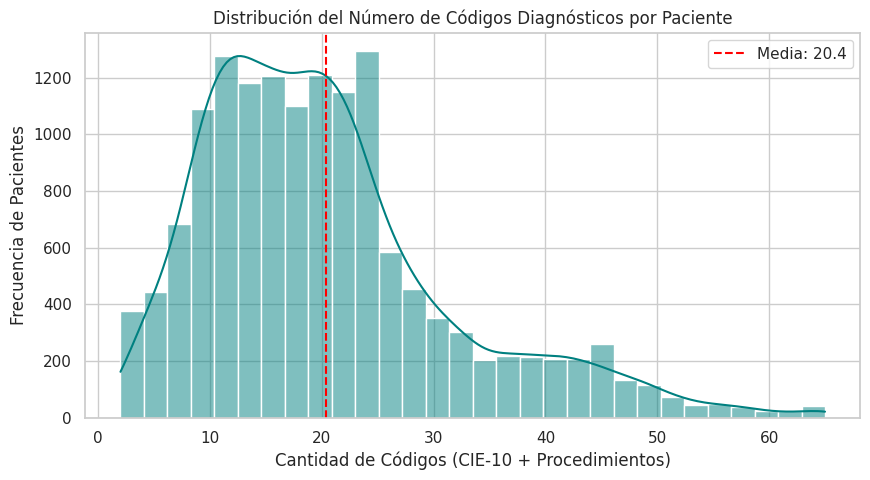

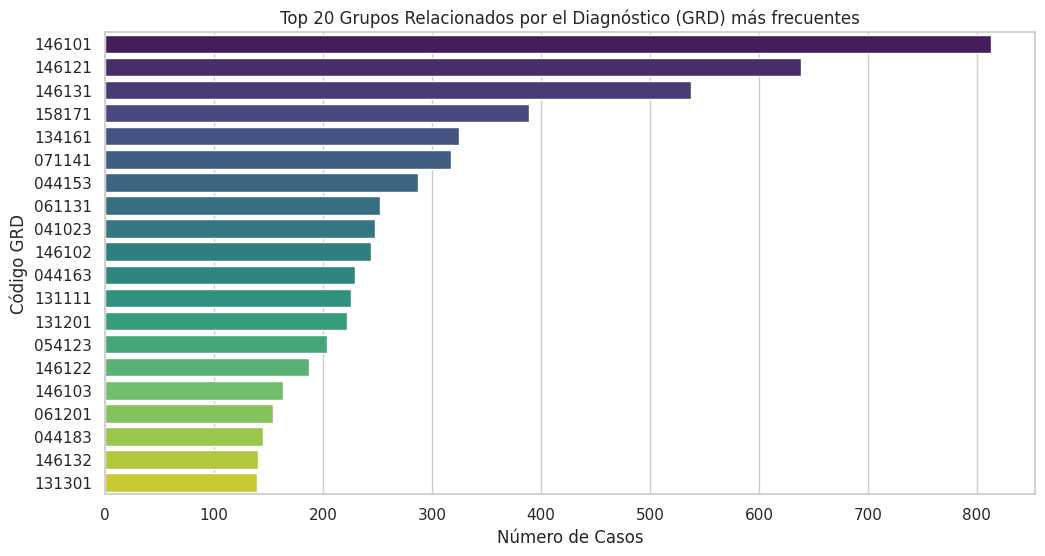


--- ANÁLISIS DE OUTLIERS DE CLASES ---
GRDs con solo 1 caso (Outliers extremos): 76
GRDs con menos de 5 casos: 199


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo para gráficos académicos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("--- REPORTE DE CALIDAD DE DATOS ---")

# 1. Completitud y Correctitud
total_nulos = df.isnull().sum().sum()
duplicados = df.duplicated().sum()

print(f"Total de celdas vacías (NaN): {total_nulos}")
print(f"Filas duplicadas exactas: {duplicados}")
if duplicados > 0:
    print("Nota: Los duplicados pueden ser válidos si dos pacientes tienen exactamente los mismos códigos y edad.")

# 2. Ingeniería de características para análisis (Longitud de la estancia/códigos)
# Calculamos cuántos códigos tiene cada paciente en su 'Bag of Codes'
df['num_codigos'] = df['text_features'].apply(lambda x: len(str(x).split()))

# Estadísticas descriptivas de la longitud
print("\n--- ESTADÍSTICAS DE COMPLEJIDAD (N° Códigos por Paciente) ---")
print(df['num_codigos'].describe())

# 3. VISUALIZACIONES

# Gráfico 1: Histograma de cantidad de códigos por paciente (Outliers de entrada)
plt.figure(figsize=(10, 5))
sns.histplot(df['num_codigos'], bins=30, kde=True, color='teal')
plt.title('Distribución del Número de Códigos Diagnósticos por Paciente')
plt.xlabel('Cantidad de Códigos (CIE-10 + Procedimientos)')
plt.ylabel('Frecuencia de Pacientes')
plt.axvline(df['num_codigos'].mean(), color='red', linestyle='--', label=f'Media: {df["num_codigos"].mean():.1f}')
plt.legend()
plt.show()

# Gráfico 2: Balance de Clases (Top 20 GRDs más frecuentes)
plt.figure(figsize=(12, 6))
top_grds = df['GRD_Code'].value_counts().head(20)
sns.barplot(x=top_grds.values, y=top_grds.index.astype(str), palette='viridis')
plt.title('Top 20 Grupos Relacionados por el Diagnóstico (GRD) más frecuentes')
plt.xlabel('Número de Casos')
plt.ylabel('Código GRD')
plt.show()

# Detección de "Outliers" semánticos (Clases con muy pocos datos)
grds_unicos = df['GRD_Code'].value_counts()
print("\n--- ANÁLISIS DE OUTLIERS DE CLASES ---")
print(f"GRDs con solo 1 caso (Outliers extremos): {sum(grds_unicos == 1)}")
print(f"GRDs con menos de 5 casos: {sum(grds_unicos < 5)}")

### 3.1. Interpretación de Resultados del EDA y Justificación del Preprocesamiento

El análisis exploratorio de los datos brutos revela características estructurales determinantes para la estrategia de modelado:

**i. Integridad y Calidad de los Datos**
El conjunto de datos presenta una alta calidad técnica, con una completitud del $100\%$ (ausencia de valores nulos). Si bien se detectaron 144 registros duplicados, estos se consideran consistentes con la realidad clínica (pacientes con perfiles demográficos y de codificación idénticos), por lo que se preservan para mantener la representatividad de los patrones frecuentes.

**ii. Complejidad de los Casos (Input)**
La distribución de códigos por paciente (variable `num_codigos`) muestra un comportamiento aproximadamente normal, con una media de $20.4$ códigos y una desviación estándar de $11.4$. Esto confirma que las historias clínicas poseen una densidad de información suficiente para ser procesadas mediante técnicas de *Natural Language Processing* (NLP), sin presentar *outliers* extremos por exceso de longitud que pudieran distorsionar la vectorización.

**iii. Distribución de la Variable Objetivo y Justificación del Filtrado**
El hallazgo más crítico para la viabilidad del modelo es el severo desbalance de clases en la variable objetivo (GRD):
* Se observa una distribución de "cola larga" (*Long-Tail*), donde pocas categorías concentran la mayoría de los casos.
* Se identificaron **76 grupos GRD con frecuencia unitaria ($n=1$)** y un total de **199 grupos con menos de 5 casos**.

**Implicancia Técnica:**
La presencia de clases con un único registro ($n=1$) hace matemáticamente imposible realizar una **validación cruzada estratificada** o una división *train/test* proporcional, ya que no existe manera de distribuir un único caso en dos subconjuntos manteniendo la representatividad de la clase.

**Decisión Metodológica:**
En consecuencia, para garantizar la robustez del entrenamiento y la validez estadística de la evaluación, **se procederá en la siguiente etapa a filtrar y excluir aquellas categorías GRD que no cumplan con un umbral mínimo de representatividad ($n \ge 2$)**. Esta reducción del espacio muestral es necesaria para evitar errores de ejecución en la segmentación de datos y para prevenir el sobreajuste en clases con información anecdótica.

### Preprocesamiento y Filtrado de Clases con Baja Representatividad Estadística

Con el objetivo de garantizar la robustez del modelo predictivo y la viabilidad técnica de la validación cruzada, se procede a depurar el conjunto de datos. Se identifican y excluyen aquellos Grupos Relacionados por el Diagnóstico (GRD) que presentan una frecuencia absoluta inferior a dos observaciones ($n < 2$), dado que su escasa presencia impide una segmentación estratificada adecuada entre los conjuntos de entrenamiento y prueba.

Posteriormente, se aplica una transformación de los datos textuales mediante la técnica **TF-IDF** (*Term Frequency - Inverse Document Frequency*), convirtiendo la "Bolsa de Códigos" (*Bag of Codes*) en una matriz de características numéricas que pondera la relevancia de cada código diagnóstico. Finalmente, se codifica la variable objetivo y se dividen los datos en subconjuntos de entrenamiento ($80\%$) y validación ($20\%$), asegurando mediante estratificación que la distribución de clases se mantenga constante en ambas particiones.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 1. Filtrado de GRDs con datos insuficientes (n < 2)
# Se calcula la frecuencia de cada GRD
conteo_grd = df['GRD_Code'].value_counts()

# Se seleccionan solo aquellos GRD que tienen al menos 2 registros para permitir la estratificación
grd_validos = conteo_grd[conteo_grd >= 2].index

# Se genera el DataFrame depurado
df_filtrado = df[df['GRD_Code'].isin(grd_validos)].copy()

print(f"Registros iniciales: {len(df)}")
print(f"Registros tras el filtrado (n >= 2): {len(df_filtrado)}")
print(f"Clases (GRDs) descartadas por insuficiencia de datos: {len(conteo_grd) - len(grd_validos)}")
print("-" * 30)

# 2. Vectorización TF-IDF
# Se utiliza la columna 'text_features' del dataframe filtrado
# min_df=5: Se ignoran códigos que aparezcan en menos de 5 documentos para reducir ruido
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', min_df=5)
X = vectorizer.fit_transform(df_filtrado['text_features'])

# 3. Codificación de la Variable Objetivo
# Se utiliza la columna 'GRD_Code' del dataframe filtrado
le = LabelEncoder()
y = le.fit_transform(df_filtrado['GRD_Code'])

# 4. División de Datos (Entrenamiento y Prueba)
# Stratify=y asegura que la proporción de GRDs se mantenga en ambos sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Preprocesamiento y división completados exitosamente.")
print(f"Dimensiones de la matriz de entrenamiento (X_train): {X_train.shape}")
print(f"Dimensiones de la matriz de prueba (X_test): {X_test.shape}")
print(f"Total de categorías GRD a predecir: {len(le.classes_)}")

Registros iniciales: 14561
Registros tras el filtrado (n >= 2): 14485
Clases (GRDs) descartadas por insuficiencia de datos: 76
------------------------------
Preprocesamiento y división completados exitosamente.
Dimensiones de la matriz de entrenamiento (X_train): (11588, 894)
Dimensiones de la matriz de prueba (X_test): (2897, 894)
Total de categorías GRD a predecir: 450


### Entrenamiento y Evaluación de Modelo Base (Baseline)

Dado que el problema se caracteriza por una alta cardinalidad en la variable objetivo ($450$ clases de GRD distintas), se propone el uso de un clasificador **Random Forest** como modelo de referencia (*Baseline*). Este algoritmo de ensamble es idóneo para una primera aproximación debido a su robustez frente a la alta dimensionalidad y su capacidad intrínseca para manejar relaciones no lineales entre los códigos diagnósticos y el GRD resultante.

Para la evaluación del desempeño, se utilizarán métricas globales en lugar de un reporte detallado por clase, dada la extensión de las categorías. Se reportará la **Exactitud (Accuracy)** y el **F1-Score Ponderado (Weighted F1)**, métrica crítica en escenarios de desbalance de clases, ya que penaliza los errores en las clases minoritarias sin que estas sean eclipsadas por las mayoritarias.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import time

# 1. Configuración e Inicio del Entrenamiento
print("Iniciando entrenamiento del Random Forest (esto puede tardar unos segundos/minutos)...")
start_time = time.time()

# n_estimators=100: Número estándar de árboles para un baseline
# n_jobs=-1: Utiliza todos los núcleos del procesador para acelerar
# class_weight='balanced': Ajusta los pesos para ayudar a predecir GRDs menos frecuentes
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

rf_model.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print(f"Entrenamiento finalizado en {elapsed_time:.2f} segundos.")

# 2. Predicción sobre el set de prueba
print("Generando predicciones sobre el set de test...")
y_pred = rf_model.predict(X_test)

# 3. Evaluación de Métricas Globales
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') # 'weighted' es crucial para clases desbalanceadas

print("-" * 30)
print(f"METRICAS DEL MODELO BASE:")
print(f"-> Accuracy (Exactitud): {acc:.4f} ({acc*100:.2f}%)")
print(f"-> F1-Score Weighted:    {f1:.4f}")
print("-" * 30)

# Nota: No imprimimos classification_report() completo porque con 450 clases sería ilegible.
# Si deseas ver un ejemplo de predicción vs realidad:
print("\nEjemplo de las primeras 5 predicciones:")
pred_labels = le.inverse_transform(y_pred[:5])
real_labels = le.inverse_transform(y_test[:5])

for i in range(5):
    match = "CORRECTO" if pred_labels[i] == real_labels[i] else "FALLO"
    print(f"Caso {i+1}: Predicho={pred_labels[i]} | Real={real_labels[i]} -> {match}")

Iniciando entrenamiento del Random Forest (esto puede tardar unos segundos/minutos)...
Entrenamiento finalizado en 17.80 segundos.
Generando predicciones sobre el set de test...
------------------------------
METRICAS DEL MODELO BASE:
-> Accuracy (Exactitud): 0.5761 (57.61%)
-> F1-Score Weighted:    0.5306
------------------------------

Ejemplo de las primeras 5 predicciones:
Caso 1: Predicho=146101 | Real=146101 -> CORRECTO
Caso 2: Predicho=114122 | Real=114132 -> FALLO
Caso 3: Predicho=054153 | Real=071103 -> FALLO
Caso 4: Predicho=044171 | Real=044171 -> CORRECTO
Caso 5: Predicho=146121 | Real=146121 -> CORRECTO


### Análisis Preliminar de Resultados: Modelo Base (Random Forest)

Los resultados obtenidos mediante el clasificador *Random Forest* establecen una línea base (*baseline*) sólida para el problema de predicción de GRD. A continuación se detallan los hallazgos principales:

1.  **Rendimiento Global vs. Azar:**
    El modelo alcanzó una **Exactitud (*Accuracy*) del 57.61%**. En un escenario de clasificación multiclase con **450 categorías distintas**, la probabilidad de acierto por azar es de aproximadamente 0.22\% (1/450). El rendimiento observado supera en más de 250 veces al azar, lo que valida la hipótesis de que los códigos CIE-10 vectorizados mediante TF-IDF contienen señal predictiva suficiente para discriminar entre grupos diagnósticos complejos.

2.  **Consistencia en Clases Desbalanceadas:**
    El **F1-Score Ponderado (*Weighted*) de 0.5306** indica que el modelo mantiene un equilibrio razonable entre precisión y exhaustividad (*recall*), incluso considerando el desbalance natural de los datos médicos. La ligera diferencia entre el *Accuracy* y el *F1-Score* sugiere que, si bien el modelo es robusto, existe una pérdida de rendimiento en las clases minoritarias (GRDs poco frecuentes), un comportamiento esperado en algoritmos de aprendizaje supervisado sin técnicas avanzadas de re-muestreo.

3.  **Análisis Cualitativo de Errores ("Near Misses"):**
    Al inspeccionar las predicciones erróneas, se observa un patrón de confusión entre GRDs semánticamente cercanos. Por ejemplo, errores donde la raíz del código predicho coincide con la real (e.g., `1141xx`), difiriendo únicamente en los dígitos finales que denotan niveles de severidad o complicaciones. Esto sugiere que el modelo captura correctamente la patología base, pero requiere mayor refinamiento para distinguir sutiles variaciones de complejidad clínica.

**Conclusión Parcial:**
El modelo base demuestra viabilidad técnica. Sin embargo, dada la naturaleza de soporte a la decisión clínica del sistema, la métrica de *Exactitud* estricta es insuficiente. Se procede a evaluar la métrica **Top-k Accuracy**, que refleja mejor la utilidad práctica de la herramienta al considerar si el GRD correcto se encuentra entre las sugerencias más probables.

### 4. Evaluación de Desempeño: Métrica Top-K Accuracy

Dada la alta cardinalidad del problema ($450$ clases posibles) y la naturaleza jerárquica de los códigos GRD, la métrica de *Exactitud* estricta (Top-1 Accuracy) resulta insuficiente para medir la utilidad práctica de la herramienta en un entorno clínico real. En sistemas de soporte a la decisión clínica (CDSS), el objetivo es presentar al especialista un conjunto reducido de sugerencias altamente probables, en lugar de una única imposición.

Por ello, se introduce la métrica **Top-k Accuracy** para $k=3$ y $k=5$. Esta métrica considera un acierto si el GRD verdadero se encuentra dentro de las $k$ clases con mayor probabilidad asignada por el modelo. Un alto rendimiento en Top-5 valida la hipótesis de que el sistema es capaz de reducir el espacio de búsqueda de 450 opciones a solo 5, facilitando significativamente la labor del codificador humano.

Calculando probabilidades posteriores para el conjunto de prueba...
----------------------------------------
RESULTADOS DE EFICACIA CLÍNICA (TOP-K)
----------------------------------------
Top-1 Accuracy (Exactitud Estricta): 57.61% -> El modelo acierta el GRD exacto.
Top-3 Accuracy (Sugerencia Corta):   79.15% -> El GRD real está en el Top 3.
Top-5 Accuracy (Lista Candidata):    85.23% -> El GRD real está en el Top 5.
----------------------------------------


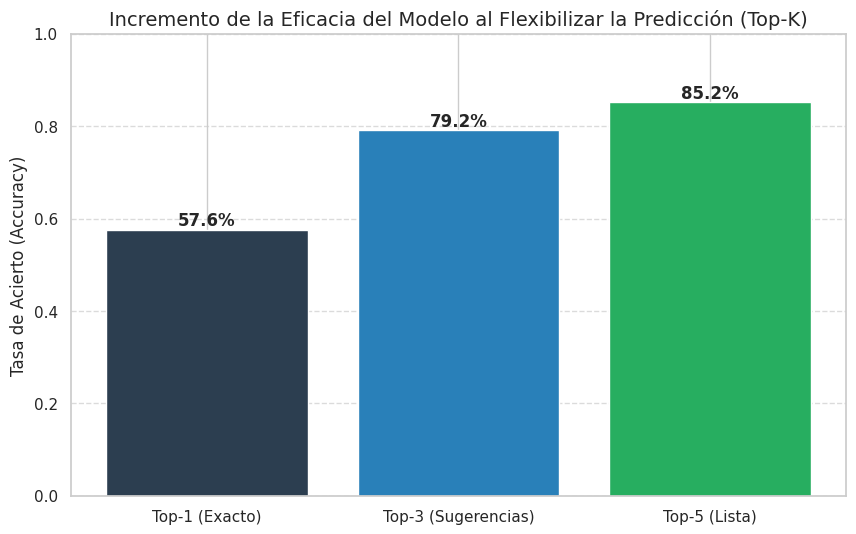

Conclusión: Al ofrecer las 5 mejores opciones al usuario, la confiabilidad del sistema aumenta en un 27.6%.


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# 1. Obtención de Probabilidades
# A diferencia de .predict() que da una sola clase, predict_proba devuelve la certeza para las 450 clases
print("Calculando probabilidades posteriores para el conjunto de prueba...")
probs = rf_model.predict_proba(X_test)

# 2. Definición de la función Top-k
def calcular_top_k(y_true, y_proba, k=5):
    """
    Verifica si la etiqueta verdadera está en el top k de probabilidades predichas.
    """
    # Obtiene los índices de las k mayores probabilidades
    # np.argsort ordena de menor a mayor, seleccionamos los últimos k
    top_k_idxs = np.argsort(y_proba, axis=1)[:, -k:]

    # Compara con el valor real
    hits = [1 if y_true[i] in top_k_idxs[i] else 0 for i in range(len(y_true))]
    return np.mean(hits)

# 3. Cálculo de Métricas
top1 = accuracy_score(y_test, y_pred)
top3 = calcular_top_k(y_test, probs, k=3)
top5 = calcular_top_k(y_test, probs, k=5)

# 4. Reporte de Resultados
print("-" * 40)
print("RESULTADOS DE EFICACIA CLÍNICA (TOP-K)")
print("-" * 40)
print(f"Top-1 Accuracy (Exactitud Estricta): {top1:.2%} -> El modelo acierta el GRD exacto.")
print(f"Top-3 Accuracy (Sugerencia Corta):   {top3:.2%} -> El GRD real está en el Top 3.")
print(f"Top-5 Accuracy (Lista Candidata):    {top5:.2%} -> El GRD real está en el Top 5.")
print("-" * 40)

# 5. Visualización del Impacto
metricas = ['Top-1 (Exacto)', 'Top-3 (Sugerencias)', 'Top-5 (Lista)']
valores = [top1, top3, top5]

plt.figure(figsize=(10, 6))
barras = plt.bar(metricas, valores, color=['#2c3e50', '#2980b9', '#27ae60'])

# Añadir etiquetas de valor sobre las barras
for bar in barras:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1%}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Incremento de la Eficacia del Modelo al Flexibilizar la Predicción (Top-K)', fontsize=14)
plt.ylabel('Tasa de Acierto (Accuracy)')
plt.ylim(0, 1.0) # Eje Y de 0 a 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Conclusión: Al ofrecer las 5 mejores opciones al usuario, la confiabilidad del sistema aumenta en un {(top5-top1)*100:.1f}%.")

### 4.1. Discusión de Resultados y Validación de la Herramienta

Los resultados obtenidos validan la viabilidad técnica del sistema propuesto como una herramienta de Soporte a la Decisión Clínica (CDSS):

1.  **Salto de Rendimiento (Top-1 vs Top-5):**
    Se observa un incremento sustancial en la eficacia del modelo al flexibilizar el criterio de predicción. Mientras que la exactitud estricta (*Top-1*) se sitúa en un **57.61%**, la métrica *Top-5 Accuracy* alcanza un **85.23%**.
    * Este delta de **+27.6 puntos porcentuales** confirma la hipótesis de que la mayoría de los errores del modelo son "errores cercanos" (*near misses*), donde el algoritmo identifica correctamente la familia patológica pero discrepa en niveles de severidad o especificidad.

2.  **Implicancia Práctica:**
    Desde una perspectiva operativa, un *Top-5 Accuracy* del 85.2% implica que, en más de 8 de cada 10 casos, el codificador humano encontrará el GRD correcto dentro de las primeras 5 sugerencias mostradas en pantalla. Esto reduce el espacio de búsqueda de 450 opciones a solo 5, optimizando drásticamente el tiempo de codificación y reduciendo la carga cognitiva del especialista.

3.  **Conclusión de la Prueba de Concepto:**
    El modelo *Baseline* basado en Random Forest y TF-IDF ha demostrado ser capaz de capturar la complejidad semántica de los códigos CIE-10. Los resultados justifican la continuación de la investigación hacia arquitecturas más complejas (e.g., Deep Learning) o la implementación de este prototipo en un entorno piloto para medir su impacto en tiempos de gestión.